In [ ]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1.Kmeans (비지도 학습)

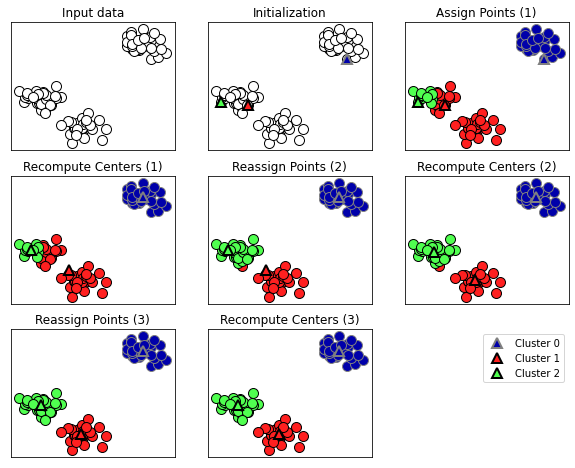

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

In [ ]:
df = pd.read_csv('datas/kmean.csv', index_col='Unnamed: 0')
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


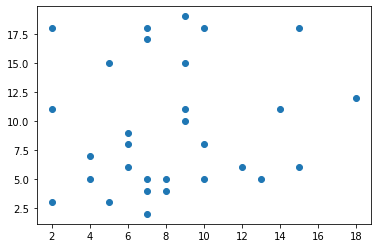

In [ ]:
plt.scatter(df['x'],df['y'])

In [ ]:
k = KMeans(n_clusters = 4,) # n_clusters = 8 기본 값으로 8개의 군집으로 나눔
km = k.fit(df)

In [ ]:
type(km)

sklearn.cluster._kmeans.KMeans

In [ ]:
cen = km.cluster_centers_

cen

array([[ 7.        , 17.14285714],
       [11.14285714,  7.28571429],
       [ 5.53846154,  5.53846154],
       [15.66666667, 13.66666667]])

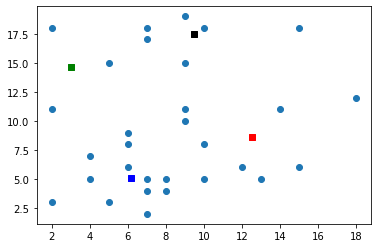

In [ ]:
plt.scatter(df['x'],df['y'])
plt.scatter(cen[:,0],cen[:,1], marker ='s', c = ['r','g','b','k'])
plt.show()

In [ ]:
km.labels_

array([2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 3, 3, 2,
       0, 3, 0, 0, 0, 0, 3, 0])

In [ ]:
df['labels'] = km.labels_
df

,x,y,labels
0,2,3,2
1,2,11,1
2,2,18,1
3,4,5,2
4,4,7,2
5,5,3,2
6,5,15,1
7,6,6,2
8,6,8,2
9,6,9,2


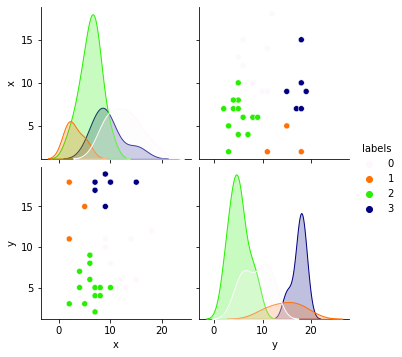

In [ ]:
sns.pairplot(df, hue='labels', palette='gist_ncar_r')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

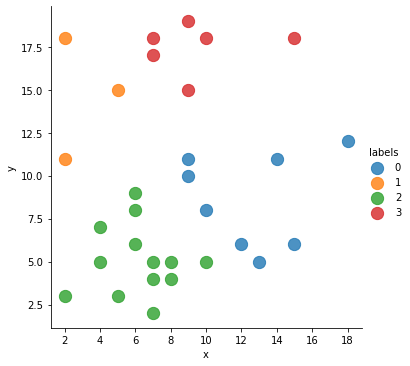

In [ ]:
sns.lmplot(x = 'x', y = 'y', data=df , hue='labels', fit_reg=False,
          scatter_kws = {'s' : 150})
plt.plot

## 1-1.km.inertia_  >> 각 센터를 중심으로 떨어진 거리의 총합의 평균

In [ ]:
data = []
for n in range(1,15):
    model = KMeans( n_clusters=n)
    km = model.fit( df )
    data.append( km.inertia_ )
    
plt.plot(range(1,15) , data, 'ro--' )
plt.show()

C:\Users\cv002\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


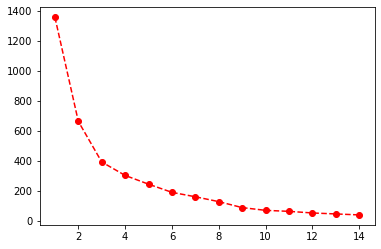

In [ ]:
plt.plot(range(1,15) , data, 'ro--' )
plt.show()

# 그래프를 보면 4 `~ 5 정도가 최적의 n_cluster 값

---
## 1-2.연습문제
iris 데이터 특성데이터(sl, sw, pl,pw)를 이용하여 군집분류(3)를 수행하고

pairplot을 그리고 실제값과 정확도를 확인하시오, intertia 차트를 그리시오


In [ ]:
iris = load_iris()
df =  pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = iris['target']

x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

In [ ]:
k = KMeans(n_clusters=3)
km = k.fit(x_data,y_data)

In [ ]:
x_data['labels'] = km.labels_

In [ ]:
(km.labels_ == iris['target']).mean()

0.44

<function matplotlib.pyplot.show(close=None, block=None)>

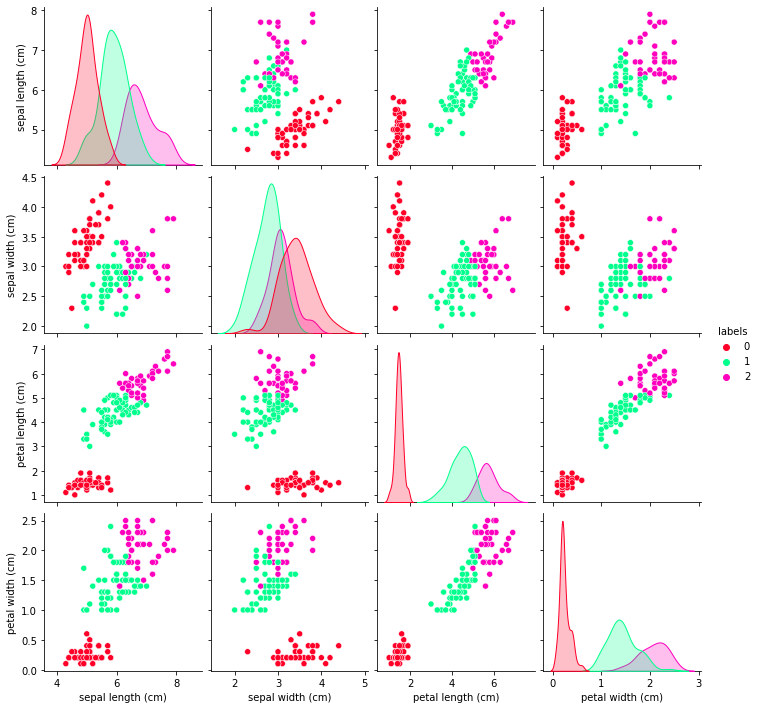

In [ ]:
sns.pairplot(x_data, hue = 'labels', palette='gist_rainbow')
plt.show

C:\Users\cv002\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

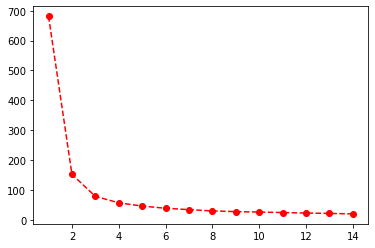

In [ ]:
data = []

x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

for n in range(1,15):
    k = KMeans(n_clusters=n)
    km = k.fit(x_data,y_data)
    data.append( km.inertia_)
    
plt.plot(range(1,15), data, 'ro--')
plt.show